In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mohammadhossein77_brain_tumors_dataset_path = kagglehub.dataset_download('mohammadhossein77/brain-tumors-dataset')
manojreyya_testing1_path = kagglehub.dataset_download('manojreyya/testing1')
xyznihal_crystal_clean_brain_tumors_mri_dataset_path = kagglehub.notebook_output_download('xyznihal/crystal-clean-brain-tumors-mri-dataset')

print('Data source import complete.')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training dataset
x_train = train_datagen.flow_from_directory(
    '/kaggle/input/brain-tumors-dataset/Data',  # Root directory containing 'normal' and 'tumor' folders
    target_size=(64, 64),
    class_mode='categorical',  # Since we have multiple categories (normal + tumor types)
    batch_size=100,
    shuffle=True
)

# Load testing dataset
x_test = test_datagen.flow_from_directory(
    '/kaggle/input/brain-tumors-dataset/Data',
    target_size=(64, 64),
    class_mode='categorical',
    batch_size=100,
    shuffle=False
)

# Build CNN model
model = Sequential()
model.add(Input(shape=(64,64,3)))  # Explicitly define input layer
model.add(Conv2D(32, (3,3), activation='relu'))  # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2)))  # MaxPooling layer
model.add(Flatten())  # Flatten layer

# Fully connected layers
model.add(Dense(300, activation='relu'))  # Hidden layer 1
model.add(Dense(150, activation='relu'))  # Hidden layer 2

# Output layer (number of categories)
model.add(Dense(len(x_train.class_indices), activation='softmax'))  # Dynamically setting output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    x_train,
    steps_per_epoch=x_train.samples // x_train.batch_size,
    epochs=10,
    validation_data=x_test,
    validation_steps=x_test.samples // x_test.batch_size
)

Found 21672 images belonging to 2 classes.
Found 21672 images belonging to 2 classes.
Epoch 1/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 79s 352ms/step - accuracy: 0.8605 - loss: 0.5104 - val_accuracy: 0.7935 - val_loss: 0.4557
Epoch 2/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8900 - loss: 0.3269 - val_accuracy: 0.9722 - val_loss: 0.2379
Epoch 3/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 76s 344ms/step - accuracy: 0.9008 - loss: 0.2407 - val_accuracy: 0.7859 - val_loss: 0.4565
Epoch 4/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.9300 - loss: 0.2314 - val_accuracy: 0.9444 - val_loss: 0.2161
Epoch 5/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 75s 339ms/step - accuracy: 0.9164 - loss: 0.2084 - val_accuracy: 0.9081 - val_loss: 0.2255
Epoch 6/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.9000 - loss: 0.2730 - val_accuracy: 0.9861 - val_loss: 0.0612
Epoch 7/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 76s 346ms/step - accuracy: 0.9255 - loss: 0.1779 - val_accuracy: 0.8659 - val_loss: 0.3002
Ep

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


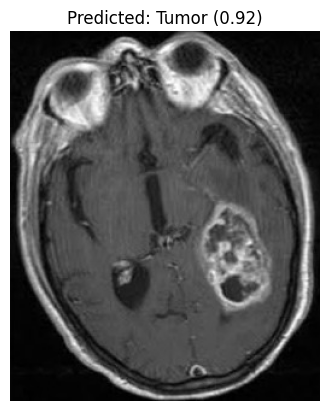

Predicted Class: Tumor


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
# Save the trained model
model.save('brain_tumor_model.h5')

# Function to preprocess an image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))  # Resize to match model input size
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array

# Function to make predictions
def predict_image(img_path, model):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)  # Get class index
    class_labels = {v: k for k, v in x_train.class_indices.items()}  # Get class labels
    confidence = np.max(prediction)  # Get confidence score

    plt.imshow(image.load_img(img_path))  # Display image
    plt.axis("off")
    plt.title(f"Predicted: {class_labels[predicted_class]} ({confidence:.2f})")
    plt.show()
    return class_labels[predicted_class]

# Load the trained model
model = tf.keras.models.load_model('brain_tumor_model.h5')

# Example usage
image_path = "/kaggle/input/testing1/Te-meTr_0001.jpg"  # Replace with actual file path
predicted_label = predict_image(image_path, model)
print(f"Predicted Class: {predicted_label}")
